In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/PhishTank/Base_classifier_result(cross).csv")
data.head()

,labels,dt_prediction_non,dt_prediction_phish,svc_prediction_non,svc_prediction_phish,knn_prediction_non,knn_prediction_phish,XGB_prediction_non,XGB_prediction_phish,mlp_prediction_non,mlp_prediction_phish,lr_prediction_non,lr_prediction_phish
0,1,0.0,1.0,0.000017,0.999983,0.0,1.0,0.001029,0.998971,0.0,1.000000e+00,0.000270,9.997303e-01
1,0,1.0,0.0,0.998758,0.001242,1.0,0.0,0.998700,0.001300,1.0,1.997412e-08,0.996904,3.095984e-03
2,0,1.0,0.0,0.999882,0.000118,1.0,0.0,0.998280,0.001720,1.0,8.735003e-24,1.000000,4.504168e-07
3,1,0.0,1.0,0.000003,0.999997,0.0,1.0,0.000332,0.999668,0.0,1.000000e+00,0.000228,9.997721e-01
4,0,1.0,0.0,0.993386,0.006614,1.0,0.0,0.997946,0.002054,1.0,8.705020e-08,0.992682,7.317703e-03


In [ ]:
data.shape

(5850, 13)

In [ ]:
data.columns

Index(['labels', 'dt_prediction_non', 'dt_prediction_phish',
       'svc_prediction_non', 'svc_prediction_phish', 'knn_prediction_non',
       'knn_prediction_phish', 'XGB_prediction_non', 'XGB_prediction_phish',
       'mlp_prediction_non', 'mlp_prediction_phish', 'lr_prediction_non',
       'lr_prediction_phish'],
      dtype='object')

In [ ]:
data.describe()

,labels,dt_prediction_non,dt_prediction_phish,svc_prediction_non,svc_prediction_phish,knn_prediction_non,knn_prediction_phish,XGB_prediction_non,XGB_prediction_phish,mlp_prediction_non,mlp_prediction_phish,lr_prediction_non,lr_prediction_phish
count,5850.000000,5850.000000,5850.000000,5.850000e+03,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5850.000000,5.850000e+03,5.850000e+03,5.850000e+03
mean,0.492991,0.513248,0.486752,5.065014e-01,0.493499,0.512752,0.487248,0.509616,0.490384,0.509899,4.901006e-01,5.083970e-01,4.916030e-01
std,0.499994,0.499739,0.499739,4.637708e-01,0.463771,0.486977,0.486977,0.478059,0.478059,0.496920,4.969205e-01,4.715464e-01,4.715464e-01
min,0.000000,0.000000,0.000000,2.462147e-07,0.000002,0.000000,0.000000,0.000142,0.000689,0.000000,6.369035e-39,1.064077e-08,6.209084e-50
25%,0.000000,0.000000,0.000000,3.378914e-03,0.008904,0.000000,0.000000,0.000877,0.005258,0.000000,6.805629e-07,2.696771e-04,6.906694e-03
50%,0.000000,1.000000,0.000000,6.322863e-01,0.367714,0.600000,0.400000,0.684071,0.315929,0.956613,4.338706e-02,7.194031e-01,2.805969e-01
75%,1.000000,1.000000,1.000000,9.910955e-01,0.996621,1.000000,1.000000,0.994742,0.999123,0.999999,1.000000e+00,9.930933e-01,9.997303e-01
max,1.000000,1.000000,1.000000,9.999978e-01,1.000000,1.000000,1.000000,0.999311,0.999858,1.000000,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
import numpy as np


y = data['labels'].values
x = np.array(data.drop('labels',axis=1))


print(x.shape, y.shape)

(5850, 12) (5850,)


In [ ]:

import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def model_aa(x_train, x_val, y_train, y_val, opt):

  n_cols = x_train.shape[1]
  # print("check point")
  #create model
  model = Sequential()
  model.add(Dense(30, activation='relu', input_shape=(n_cols,)))
  model.add(Dense(10, activation='relu'))

  model.add(Dense(1, activation = 'sigmoid'))
  # softmax
  #compile model using mse as a measure of model performance
  model.compile(optimizer = opt, loss= 'binary_crossentropy', metrics=["accuracy"])

  history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()


  print('Validation Accuracy: ')
  # Predicting the Test set results
  y_pred = model.predict(x_val)
  y_pred = (y_pred > 0.5)


  print(classification_report(y_val, y_pred))

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

  # Creating the Confusion Matrix
  cm = confusion_matrix(y_val, y_pred)
  cm
  return metrics.accuracy_score(y_val, y_pred)



Epoch 1/100
165/165 [==============================] - 2s 6ms/step - loss: 0.4040 - accuracy: 0.9472 - val_loss: 0.1757 - val_accuracy: 0.9829
Epoch 2/100
165/165 [==============================] - 1s 3ms/step - loss: 0.0941 - accuracy: 0.9886 - val_loss: 0.0543 - val_accuracy: 0.9863
Epoch 3/100
165/165 [==============================] - 1s 3ms/step - loss: 0.0422 - accuracy: 0.9892 - val_loss: 0.0423 - val_accuracy: 0.9863
Epoch 4/100
165/165 [==============================] - 1s 7ms/step - loss: 0.0364 - accuracy: 0.9896 - val_loss: 0.0389 - val_accuracy: 0.9863
Epoch 5/100
165/165 [==============================] - 1s 8ms/step - loss: 0.0350 - accuracy: 0.9896 - val_loss: 0.0392 - val_accuracy: 0.9863
Epoch 6/100
165/165 [==============================] - 1s 7ms/step - loss: 0.0344 - accuracy: 0.9892 - val_loss: 0.0385 - val_accuracy: 0.9863
Epoch 7/100
165/165 [==============================] - 1s 7ms/step - loss: 0.0341 - accuracy: 0.9892 - val_loss: 0.0383 - val_accuracy: 0.9863

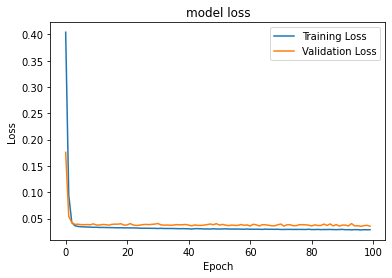

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       284
           1       0.99      0.98      0.99       301

    accuracy                           0.99       585
   macro avg       0.99      0.99      0.99       585
weighted avg       0.99      0.99      0.99       585

Accuracy: 0.9880341880341881
Epoch 1/100
165/165 [==============================] - 1s 3ms/step - loss: 0.1042 - accuracy: 0.9709 - val_loss: 0.0427 - val_accuracy: 0.9863
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.9884 - val_loss: 0.0408 - val_accuracy: 0.9880
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.9884 - val_loss: 0.0489 - val_accuracy: 0.9829
Epoch 4/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.9894 - val_loss: 0.0387 - val_accuracy: 0.9880
Epoch 5/100
165/165 [=============================

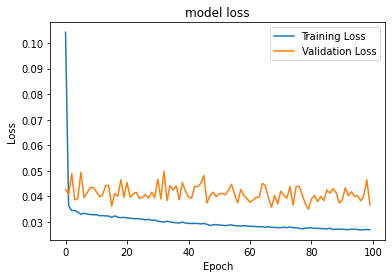

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       301
           1       1.00      0.97      0.99       284

    accuracy                           0.99       585
   macro avg       0.99      0.99      0.99       585
weighted avg       0.99      0.99      0.99       585

Accuracy: 0.9863247863247864
Epoch 1/100
165/165 [==============================] - 1s 3ms/step - loss: 0.0946 - accuracy: 0.9685 - val_loss: 0.0170 - val_accuracy: 0.9983
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0382 - accuracy: 0.9877 - val_loss: 0.0154 - val_accuracy: 0.9983
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9880 - val_loss: 0.0143 - val_accuracy: 0.9983
Epoch 4/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.9880 - val_loss: 0.0148 - val_accuracy: 0.9983
Epoch 5/100
165/165 [=============================

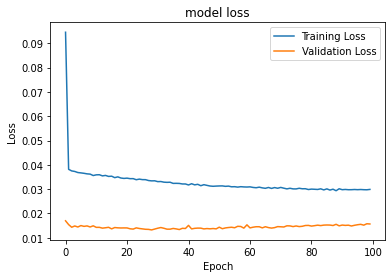

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       299
           1       1.00      1.00      1.00       286

    accuracy                           1.00       585
   macro avg       1.00      1.00      1.00       585
weighted avg       1.00      1.00      1.00       585

Accuracy: 0.9965811965811966
Epoch 1/100
165/165 [==============================] - 1s 3ms/step - loss: 0.1160 - accuracy: 0.9882 - val_loss: 0.0481 - val_accuracy: 0.9846
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9886 - val_loss: 0.0473 - val_accuracy: 0.9846
Epoch 3/100
165/165 [==============================] - 1s 3ms/step - loss: 0.0346 - accuracy: 0.9897 - val_loss: 0.0462 - val_accuracy: 0.9846
Epoch 4/100
165/165 [==============================] - 1s 5ms/step - loss: 0.0340 - accuracy: 0.9890 - val_loss: 0.0460 - val_accuracy: 0.9846
Epoch 5/100
165/165 [=============================

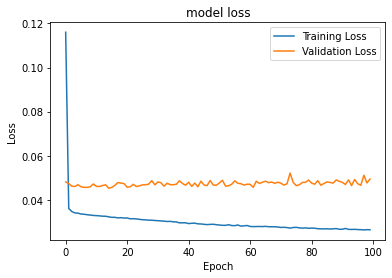

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       275
           1       1.00      0.98      0.99       310

    accuracy                           0.99       585
   macro avg       0.99      0.99      0.99       585
weighted avg       0.99      0.99      0.99       585

Accuracy: 0.9880341880341881
Epoch 1/100
165/165 [==============================] - 1s 3ms/step - loss: 0.1203 - accuracy: 0.9827 - val_loss: 0.0324 - val_accuracy: 0.9863
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9896 - val_loss: 0.0382 - val_accuracy: 0.9846
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9894 - val_loss: 0.0360 - val_accuracy: 0.9846
Epoch 4/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 0.9894 - val_loss: 0.0373 - val_accuracy: 0.9846
Epoch 5/100
165/165 [=============================

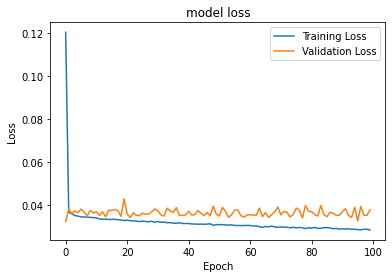

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       303
           1       0.98      1.00      0.99       282

    accuracy                           0.99       585
   macro avg       0.99      0.99      0.99       585
weighted avg       0.99      0.99      0.99       585

Accuracy: 0.9880341880341881
Epoch 1/100
165/165 [==============================] - 1s 3ms/step - loss: 0.1897 - accuracy: 0.9538 - val_loss: 0.0521 - val_accuracy: 0.9846
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0358 - accuracy: 0.9894 - val_loss: 0.0503 - val_accuracy: 0.9863
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 0.9896 - val_loss: 0.0508 - val_accuracy: 0.9846
Epoch 4/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0340 - accuracy: 0.9899 - val_loss: 0.0507 - val_accuracy: 0.9846
Epoch 5/100
165/165 [=============================

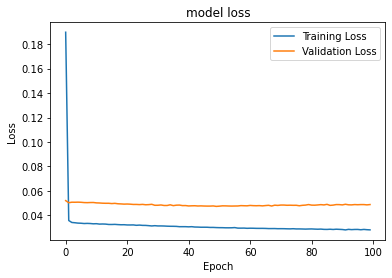

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       283
           1       0.98      0.99      0.98       302

    accuracy                           0.98       585
   macro avg       0.98      0.98      0.98       585
weighted avg       0.98      0.98      0.98       585

Accuracy: 0.9811965811965812
Epoch 1/100
165/165 [==============================] - 1s 3ms/step - loss: 0.1123 - accuracy: 0.9696 - val_loss: 0.0199 - val_accuracy: 0.9949
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0382 - accuracy: 0.9877 - val_loss: 0.0181 - val_accuracy: 0.9932
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9880 - val_loss: 0.0194 - val_accuracy: 0.9932
Epoch 4/100
165/165 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.9882 - val_loss: 0.0171 - val_accuracy: 0.9949
Epoch 5/100
165/165 [=============================

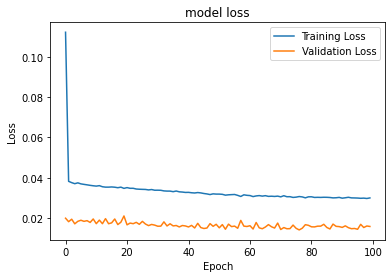

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       326
           1       0.99      1.00      1.00       259

    accuracy                           1.00       585
   macro avg       1.00      1.00      1.00       585
weighted avg       1.00      1.00      1.00       585

Accuracy: 0.9965811965811966
Epoch 1/100
165/165 [==============================] - 1s 3ms/step - loss: 0.1739 - accuracy: 0.9806 - val_loss: 0.0360 - val_accuracy: 0.9897
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9888 - val_loss: 0.0298 - val_accuracy: 0.9880
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 0.9886 - val_loss: 0.0296 - val_accuracy: 0.9880
Epoch 4/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0367 - accuracy: 0.9884 - val_loss: 0.0285 - val_accuracy: 0.9880
Epoch 5/100
165/165 [=============================

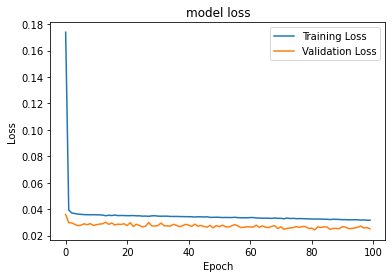

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       301
           1       0.98      0.99      0.99       284

    accuracy                           0.99       585
   macro avg       0.99      0.99      0.99       585
weighted avg       0.99      0.99      0.99       585

Accuracy: 0.9880341880341881
Epoch 1/100
165/165 [==============================] - 1s 3ms/step - loss: 0.1122 - accuracy: 0.9877 - val_loss: 0.0470 - val_accuracy: 0.9863
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9892 - val_loss: 0.0471 - val_accuracy: 0.9880
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.9899 - val_loss: 0.0481 - val_accuracy: 0.9863
Epoch 4/100
165/165 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9886 - val_loss: 0.0477 - val_accuracy: 0.9880
Epoch 5/100
165/165 [=============================

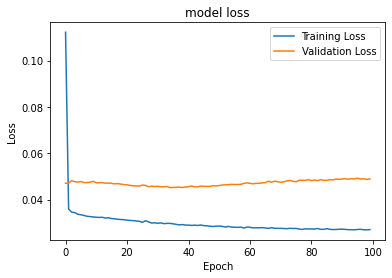

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       291
           1       0.99      0.99      0.99       294

    accuracy                           0.99       585
   macro avg       0.99      0.99      0.99       585
weighted avg       0.99      0.99      0.99       585

Accuracy: 0.9880341880341881
Epoch 1/100
165/165 [==============================] - 1s 3ms/step - loss: 0.1543 - accuracy: 0.9472 - val_loss: 0.0408 - val_accuracy: 0.9846
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.0411 - val_accuracy: 0.9846
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0352 - accuracy: 0.9892 - val_loss: 0.0399 - val_accuracy: 0.9846
Epoch 4/100
165/165 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 0.9890 - val_loss: 0.0398 - val_accuracy: 0.9846
Epoch 5/100
165/165 [=============================

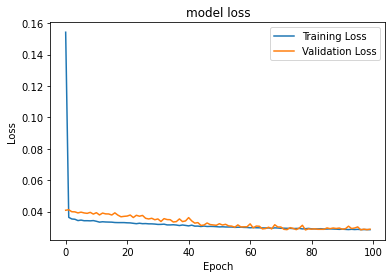

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       303
           1       0.99      0.99      0.99       282

    accuracy                           0.99       585
   macro avg       0.99      0.99      0.99       585
weighted avg       0.99      0.99      0.99       585

Accuracy: 0.9880341880341881
Average Validation Accuracy: 0.9888888888888889


In [ ]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0
kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x, y):
  val_acc = model_aa(x[train], x[val], y[train], y[val], optimizer1)
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)

